In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv("../outputs/db_filtrado_04062023.csv")
df.shape

(12761, 17)

In [7]:
df["modelo"].unique()

array(['Nivus', 'Renegade', 'Yaris Hatch', 'Toro', 'Ranger Cab. Dupla',
       'HB20', 'Kwid', '2008', 'Gol', 'HR-V', 'Argo', 'T-Cross',
       'Sandero', 'Logan', 'S 10 Cab. Dupla', 'Strada Cab. Simples',
       'Mobi', 'Virtus', 'HB20 S', 'XC60', 'Spin', 'Creta',
       'Strada Cab Dupla', 'Duster', 'Hilux CD', 'C4 Cactus',
       'Onix Sedan', 'Onix Hatch', 'Kicks', 'Corolla', 'Tiguan', 'L200',
       'Voyage', 'Saveiro Cab. Simples', 'Tracker', 'Q3',
       'Fiorino Furgão', 'Civic', 'Compass', 'Cronos', 'Uno',
       'Saveiro Cab Dupla', 'Up!', 'Polo Hatch', 'Captur', 'Versa',
       'City Sedan', 'Frontier', '208', 'Jimny', '320i', 'Doblo',
       'Amarok', 'Fox', 'X1', 'KA Hatch', 'Siena Grand', 'HB20 X',
       'KA Sedan', 'EcoSport', 'Cruze Sedan', 'Tucson', 'Cooper', 'Joy',
       'Montana', 'Etios Sedan', 'Hilux SW4', 'IX35', 'Jetta', 'C 180',
       'Outlander', 'WR-V', 'Oroch', 'A3', 'ASX', 'Discovery Sport',
       'Fit', 'A 200', '3008', 'March', 'Range Rover Evoque', 'P

In [17]:
sum_model_price = df.groupby(["modelo"])["preco"].sum()
number_of_cars_of_model = df.groupby(["modelo"])["preco"].count()
models_mean =  sum_model_price / number_of_cars_of_model 
print(models_mean)

modelo
2008            69712.999730
207             22479.032258
208             58457.690909
3008           121829.444444
320i           146113.602041
                   ...      
Voyage          50518.111556
WR-V            88306.956522
X1             136768.718750
XC60           141603.076923
Yaris Hatch     82392.631579
Name: preco, Length: 133, dtype: float64


In [81]:
def add_mean_per_model(row):
    return models_mean[row["modelo"]]

df["media-modelo"] = df.apply(add_mean_per_model, axis=1)
models_and_prices = df[["modelo", "media-modelo"]]
models_and_prices

,modelo,media-modelo
0,Nivus,115423.428571
1,Renegade,92539.360307
2,Renegade,92539.360307
3,Yaris Hatch,82392.631579
4,Toro,126845.829943
...,...,...
12756,Palio Weekend,41646.315789
12757,Palio Weekend,41646.315789
12758,Punto,41332.344086
12759,Cooper,113685.000000


In [82]:
models_and_prices_short = models_and_prices.sort_values(by=["media-modelo"], ascending=False).groupby("modelo").head(1)[:10]

In [83]:
models_and_prices_short

,modelo,media-modelo
3542,Hilux SW4,209661.483333
8657,Discovery Sport,190681.333333
690,Hilux CD,178935.031120
8970,Pajero Full,163925.652174
8343,C 250,153194.117647
12691,T4,151979.599600
4372,Amarok,151894.884058
5103,S 10 Cab. Dupla,149412.006494
9407,Range Rover Evoque,146821.338983
7614,320i,146113.602041


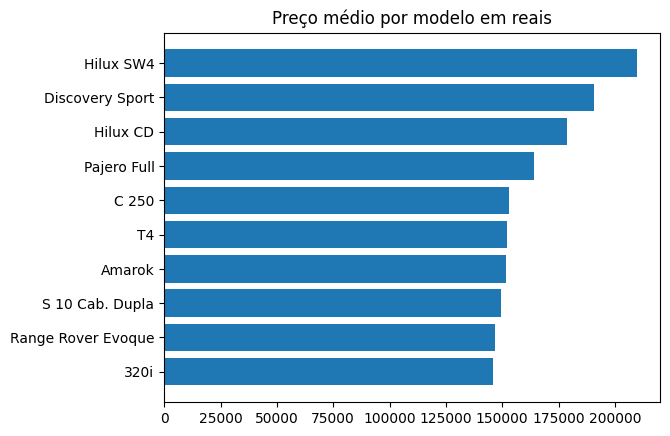

In [85]:
fig, ax = plt.subplots(1, 1)
ax.set_title("Preço médio por modelo em reais")
ax.barh(models_and_prices_short["modelo"], models_and_prices_short["media-modelo"])
ax.invert_yaxis()